In [2]:
import pandas as pd
import numpy as np

In [189]:
df = pd.read_csv('/home/nitesh/Downloads/358057080902248',header = None)

In [190]:
df = df.iloc[:,:-3]

In [191]:
df.shape

(229630, 15)

In [192]:
df.isna().sum()

0         0
1     20721
2     20721
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
dtype: int64

In [193]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,1570599955635,False,15,com.zopper.batteryage,12,27.9,3903,990,wi-fi,True
1,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,1570599956134,False,15,com.zopper.batteryage,12,27.9,3903,990,wi-fi,True
2,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,1570599961401,False,15,com.zopper.batteryage,27,27.9,3903,948,wi-fi,True
3,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,1570599961599,False,15,com.zopper.batteryage,11,27.9,3903,948,wi-fi,True
4,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,1570599966354,False,16,com.zopper.batteryage,31,27.9,3910,1012,wi-fi,True


In [194]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Charging - Current')

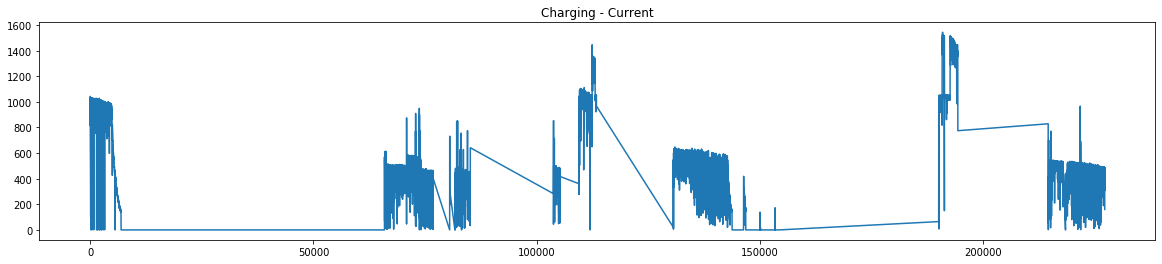

In [200]:
plt.figure(figsize=(20,4))
plt.plot(df[df[14]==True][12])
plt.title('Charging - Current')

Text(0.5, 1.0, 'Discharging - Voltage and Current')

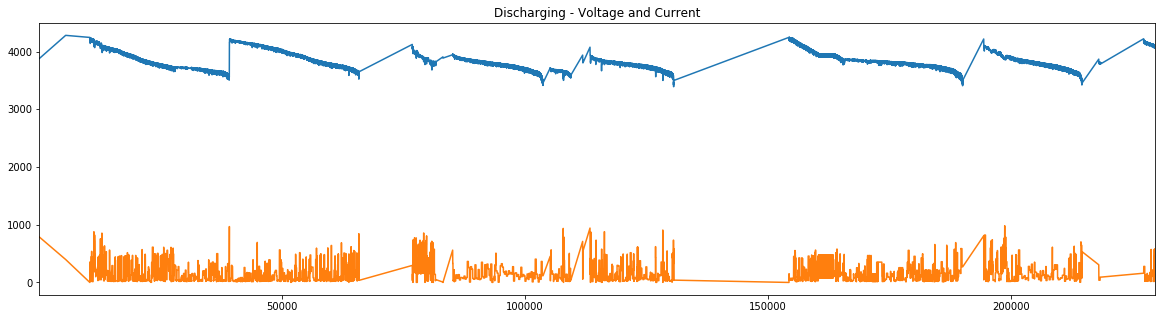

In [201]:
plt.figure(figsize=(20,5))
df[df[14]==False][11].plot()
df[df[14]==False][12].plot()

plt.title('Discharging - Voltage and Current')

Text(0.5, 1.0, 'Charging - Voltage')

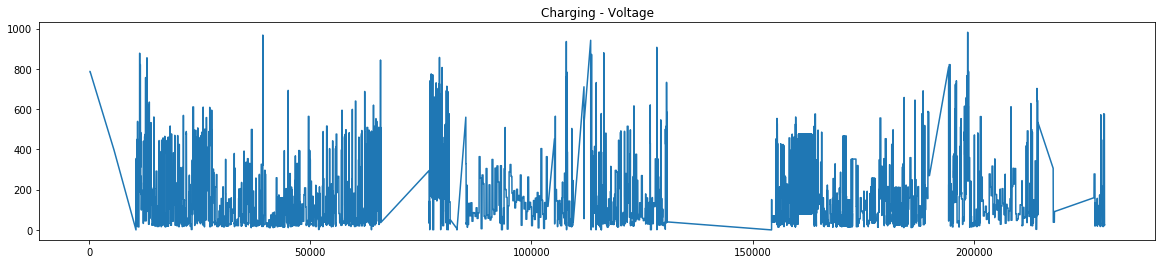

In [202]:
plt.figure(figsize=(20,4))
plt.plot(df[df[14]==False][12])
plt.title('Charging - Voltage')

Text(0.5, 1.0, 'Power')

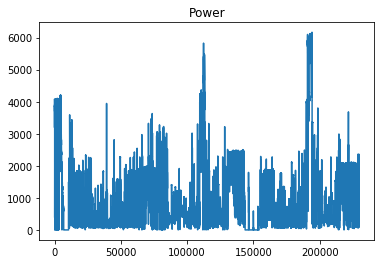

In [203]:
plt.plot((df[11]*df[12])/1000)
plt.title('Power')

In [206]:
df[5] = pd.to_datetime(df[5],unit='ms')

In [207]:
df.index = df[5]

In [208]:
df.drop(columns=[5],inplace=True)

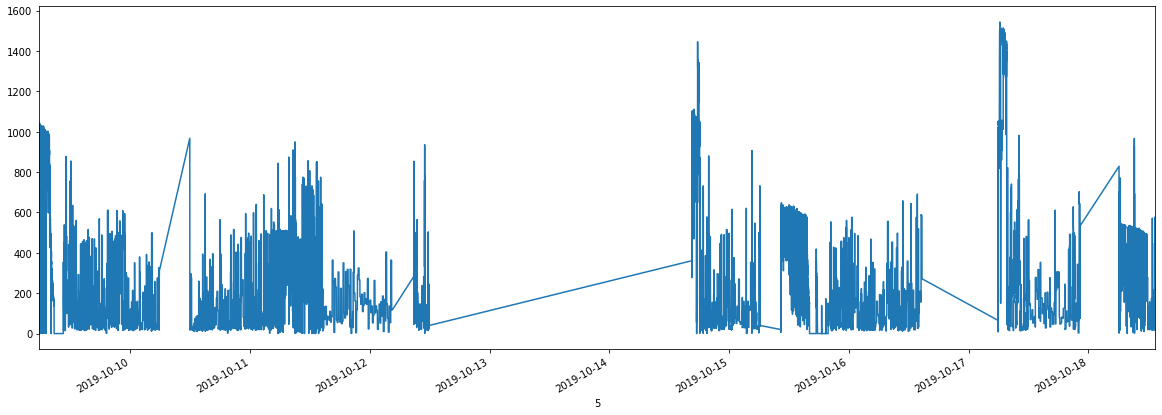

In [209]:
plt.figure(figsize=(20,7))
df[12].plot()

In [223]:
df.dropna(inplace=True,how='all')
df[df[14]==1].resample('H').mean()[12]  # Charging - to check Average Current

5
2019-10-09 05:00:00    881.562057
2019-10-09 06:00:00    949.755267
2019-10-09 07:00:00    891.303356
2019-10-09 08:00:00    197.404110
2019-10-09 09:00:00      0.000000
                          ...    
2019-10-18 07:00:00    445.627880
2019-10-18 08:00:00    458.830968
2019-10-18 09:00:00    430.817372
2019-10-18 10:00:00    414.536318
2019-10-18 11:00:00    406.492773
Freq: H, Name: 12, Length: 223, dtype: float64

In [243]:
df[11]=df[11]/1000

In [245]:
df.head()

,0,1,2,3,4,6,7,8,9,10,11,12,13,14
5,,,,,,,,,,,,,,
2019-10-09 05:45:55.635,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,False,15,com.zopper.batteryage,12,27.9,3.903,990,wi-fi,True
2019-10-09 05:45:56.134,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,False,15,com.zopper.batteryage,12,27.9,3.903,990,wi-fi,True
2019-10-09 05:46:01.401,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,False,15,com.zopper.batteryage,27,27.9,3.903,948,wi-fi,True
2019-10-09 05:46:01.599,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,False,15,com.zopper.batteryage,11,27.9,3.903,948,wi-fi,True
2019-10-09 05:46:06.354,358057080902248,samsung SM-G950F,7.0,Li-ion,3000.0,False,16,com.zopper.batteryage,31,27.9,3.910,1012,wi-fi,True


In [237]:
# Discharging mean
x = df[df[14]==True].resample('H').mean().dropna()
x.head()

,0,2,4,6,7,9,10,11,12,14
5,,,,,,,,,,
2019-10-09 05:00:00,3.580571e+14,7.0,3000.0,0.186170,19.549645,18.868794,28.657979,3912.824468,881.562057,1.0
2019-10-09 06:00:00,3.580571e+14,7.0,3000.0,0.001216,42.006078,22.468801,28.783266,3993.911669,949.755267,1.0
2019-10-09 07:00:00,3.580571e+14,7.0,3000.0,0.003442,78.923838,24.132960,28.745396,4192.644148,891.303356,1.0
2019-10-09 08:00:00,3.580571e+14,7.0,3000.0,0.894521,99.447945,25.651598,28.133242,4273.503653,197.404110,1.0
2019-10-09 09:00:00,3.580571e+14,7.0,3000.0,1.000000,100.000000,25.525544,27.901366,4247.911482,0.000000,1.0
